In [46]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [47]:
ticker = 'AAPL'
start_date = '2018-01-01'
end_date = '2023-12-20'

In [48]:
df = yf.download(ticker, start_date, end_date).reset_index()
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722878,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715778,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904911,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370613,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216961,82271200
...,...,...,...,...,...,...,...
1497,2023-12-13,195.089996,198.000000,194.850006,197.960007,197.960007,70404200
1498,2023-12-14,198.020004,199.619995,196.160004,198.110001,198.110001,66831600
1499,2023-12-15,197.529999,198.399994,197.000000,197.570007,197.570007,128256700
1500,2023-12-18,196.089996,196.630005,194.389999,195.889999,195.889999,55751900


In [49]:
close = df['Close']

In [50]:
print(close.values)

[ 43.06499863  43.05749893  43.25749969 ... 197.57000732 195.88999939
 196.94000244]


In [51]:
scaler = MinMaxScaler()
data = scaler.fit_transform(close.values.reshape(-1, 1))
data

array([[0.04624374],
       [0.04619761],
       [0.04742791],
       ...,
       [0.99667824],
       [0.98634371],
       [0.99280278]])

In [52]:
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]
train_data.shape, test_data.shape

((1201, 1), (301, 1))

In [53]:
test_data[20]

array([0.63589387])

In [54]:
past_values = 20
def data_preparation(data,past_values):
    X = []
    y = []
    for i in range(past_values, len(data)):
        X.append(data[i-20:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [55]:
X_train, y_train = data_preparation(train_data,past_values)
X_test, y_test = data_preparation(test_data,past_values)

In [56]:
X_train, y_train

(array([[[0.04624374],
         [0.04619761],
         [0.04742791],
         ...,
         [0.04509034],
         [0.03963092],
         [0.03810842]],
 
        [[0.04619761],
         [0.04742791],
         [0.05045751],
         ...,
         [0.03963092],
         [0.03810842],
         [0.03881583]],
 
        [[0.04742791],
         [0.05045751],
         [0.04945791],
         ...,
         [0.03810842],
         [0.03881583],
         [0.03935409]],
 
        ...,
 
        [[0.74071515],
         [0.73148793],
         [0.74938866],
         ...,
         [0.6314648 ],
         [0.65760859],
         [0.68006155]],
 
        [[0.73148793],
         [0.74938866],
         [0.78666662],
         ...,
         [0.65760859],
         [0.68006155],
         [0.68190692]],
 
        [[0.74938866],
         [0.78666662],
         [0.72767395],
         ...,
         [0.68006155],
         [0.68190692],
         [0.67593997]]]),
 array([[0.03881583],
        [0.03935409],
        [0.

In [57]:
X_train.shape, y_train.shape

((1181, 20, 1), (1181, 1))

In [58]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

# callback = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     min_delta=0,
#     patience=0,
#     verbose=0,
#     mode='auto',
#     baseline=None,
#     restore_best_weights=False,
#     start_from_epoch=0
# )
# model.fit(X_train, y_train, batch_size=200, epochs=500, verbose=1, callbacks=[callback])

Epoch 1/200
6/6 [==============================] - 10s 83ms/step - loss: 0.0982
Epoch 2/200
6/6 [==============================] - 0s 76ms/step - loss: 0.0231
Epoch 3/200
6/6 [==============================] - 0s 73ms/step - loss: 0.0131
Epoch 4/200
6/6 [==============================] - 1s 88ms/step - loss: 0.0052
Epoch 5/200
6/6 [==============================] - 1s 84ms/step - loss: 0.0038
Epoch 6/200
6/6 [==============================] - 1s 87ms/step - loss: 0.0028
Epoch 7/200
6/6 [==============================] - 0s 79ms/step - loss: 0.0019
Epoch 8/200
6/6 [==============================] - 0s 72ms/step - loss: 0.0014
Epoch 9/200
6/6 [==============================] - 0s 70ms/step - loss: 0.0014
Epoch 10/200
6/6 [==============================] - 1s 98ms/step - loss: 0.0013
Epoch 11/200
6/6 [==============================] - 0s 74ms/step - loss: 0.0013
Epoch 12/200
6/6 [==============================] - 0s 79ms/step - loss: 0.0012
Epoch 13/200
6/6 [==============================

6/6 [==============================] - 1s 85ms/step - loss: 8.1660e-04
Epoch 102/200
6/6 [==============================] - 1s 84ms/step - loss: 7.2473e-04
Epoch 103/200
6/6 [==============================] - 0s 83ms/step - loss: 6.8453e-04
Epoch 104/200
6/6 [==============================] - 0s 74ms/step - loss: 6.7119e-04
Epoch 105/200
6/6 [==============================] - 1s 94ms/step - loss: 6.6071e-04
Epoch 106/200
6/6 [==============================] - 0s 75ms/step - loss: 6.6895e-04
Epoch 107/200
6/6 [==============================] - 1s 84ms/step - loss: 6.9404e-04
Epoch 108/200
6/6 [==============================] - 0s 69ms/step - loss: 6.6990e-04
Epoch 109/200
6/6 [==============================] - 0s 81ms/step - loss: 6.9150e-04
Epoch 110/200
6/6 [==============================] - 0s 72ms/step - loss: 6.6654e-04
Epoch 111/200
6/6 [==============================] - 0s 71ms/step - loss: 6.6455e-04
Epoch 112/200
6/6 [==============================] - 0s 72ms/step - loss: 6.422

6/6 [==============================] - 0s 70ms/step - loss: 4.3732e-04
Epoch 198/200
6/6 [==============================] - 1s 95ms/step - loss: 4.6576e-04
Epoch 199/200
6/6 [==============================] - 0s 84ms/step - loss: 4.0012e-04
Epoch 200/200
6/6 [==============================] - 1s 110ms/step - loss: 3.9828e-04


In [59]:
pred_train = model.predict(X_train)

37/37 [==============================] - 3s 12ms/step


In [60]:
pred_train

array([[0.05136614],
       [0.04899761],
       [0.04675788],
       ...,
       [0.6691332 ],
       [0.6680198 ],
       [0.6714089 ]], dtype=float32)

In [61]:
mae = mean_absolute_error(y_train, pred_train)
print('mean absolute error-', mae)
mse = mean_squared_error(y_train, pred_train)
print('mean squared error-', mse)

mean absolute error- 0.0142528114017953
mean squared error- 0.00041849799825611757


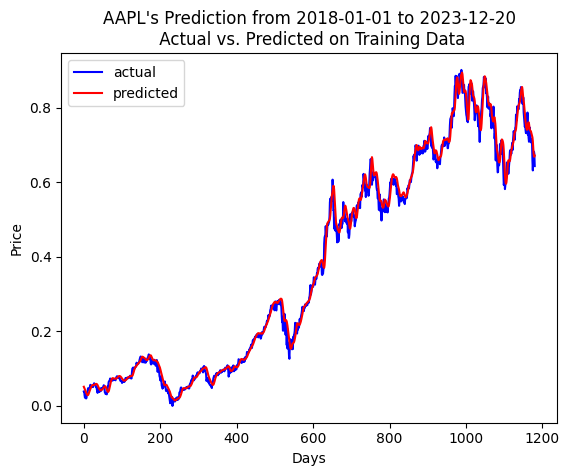

In [62]:
plt.title(f"{ticker}'s Prediction from {start_date} to {end_date}\n Actual vs. Predicted on Training Data")
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(y_train, color='blue', label='actual')
plt.plot(pred_train, color='red', label='predicted')
plt.legend()

In [63]:
pred_test = model.predict(X_test)

9/9 [==============================] - 0s 23ms/step


In [64]:
mae = mean_absolute_error(y_test, pred_test)
print('mean absolute error-', mae)
mse = mean_squared_error(y_test, pred_test)
print('mean squared error-', mse)

mean absolute error- 0.017467559583323654
mean squared error- 0.0004949403282941565


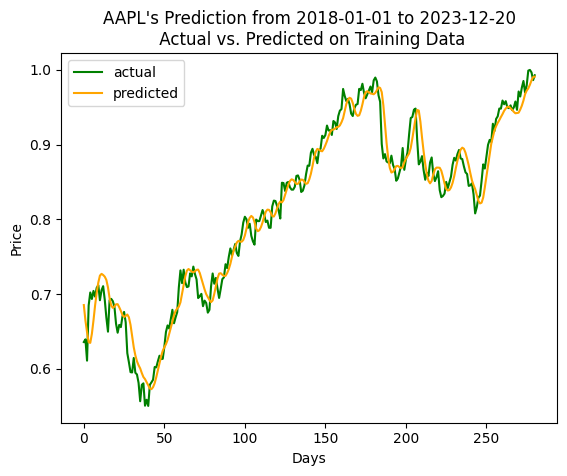

In [65]:
plt.title(f"{ticker}'s Prediction from {start_date} to {end_date}\n Actual vs. Predicted on Training Data")
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(y_test, color='green', label='actual')
plt.plot(pred_test, color='orange', label='predicted')
plt.legend()

In [75]:
ticker = 'AAPL'
start_date = '2023-12-20'
end_date = '2023-12-30'
df_future = yf.download(ticker, start_date, end_date).reset_index()['Close']
df_future

[*********************100%***********************]  1 of 1 completed


0    194.830002
1    194.679993
2    193.600006
3    193.050003
4    193.149994
5    193.580002
6    192.529999
Name: Close, dtype: float64

In [76]:
df_future = df_future.values

In [77]:
future_data_to_predict = np.array(close[-20:])
future_data_to_predict

array([190.63999939, 191.30999756, 189.97000122, 189.78999329,
       190.3999939 , 189.36999512, 189.94999695, 191.24000549,
       189.42999268, 193.41999817, 192.32000732, 194.27000427,
       195.71000671, 193.17999268, 194.71000671, 197.96000671,
       198.11000061, 197.57000732, 195.88999939, 196.94000244])

In [78]:
last_val = future_data_to_predict[-1]
last_val

196.94000244140625

---------------------------------------------------------------------------------------------------------------------------

In [79]:
def prediction(future_data, last_val, days):
    
    output_data = []
    new_arr = []

    for i in range(days):
        
        if future_data[-1] == last_val:
            print('no')
            print('before',future_data)
            temp = scaler.transform(future_data.reshape(-1, 1))
            temp_scaled_reshape = temp.reshape(1, 20, 1)
            predicted_value = model.predict(temp_scaled_reshape)
            actual_predicted = scaler.inverse_transform(predicted_value.reshape(1,-1))
            output_data.append(actual_predicted[0,0])
            print('output',actual_predicted[0,0])
            future_data = future_data[1:]
            future_data = np.append(future_data,actual_predicted)
            print('after',future_data)
        else:
            print('yes')
            print('before',future_data)
            temp = scaler.transform(future_data.reshape(-1, 1))
            temp_scaled_reshape = temp.reshape(1, 20, 1)
            predicted_value = model.predict(temp_scaled_reshape)
            actual_predicted = scaler.inverse_transform(predicted_value.reshape(1,-1))
            output_data.append(actual_predicted[0,0])
            print('output',actual_predicted[0,0])
            future_data = future_data[1:]
            future_data = np.append(future_data,actual_predicted)
            print('after',future_data)

    return output_data
    

In [84]:
result = prediction(future_data_to_predict[-20:], last_val, len(df_future))
result

no
before [190.63999939 191.30999756 189.97000122 189.78999329 190.3999939
 189.36999512 189.94999695 191.24000549 189.42999268 193.41999817
 192.32000732 194.27000427 195.71000671 193.17999268 194.71000671
 197.96000671 198.11000061 197.57000732 195.88999939 196.94000244]
1/1 [==============================] - 0s 55ms/step
output 196.43806
after [191.30999756 189.97000122 189.78999329 190.3999939  189.36999512
 189.94999695 191.24000549 189.42999268 193.41999817 192.32000732
 194.27000427 195.71000671 193.17999268 194.71000671 197.96000671
 198.11000061 197.57000732 195.88999939 196.94000244 196.43806458]
yes
before [191.30999756 189.97000122 189.78999329 190.3999939  189.36999512
 189.94999695 191.24000549 189.42999268 193.41999817 192.32000732
 194.27000427 195.71000671 193.17999268 194.71000671 197.96000671
 198.11000061 197.57000732 195.88999939 196.94000244 196.43806458]
1/1 [==============================] - 0s 40ms/step
output 196.03336
after [189.97000122 189.78999329 190.3999

[196.43806, 196.03336, 195.49823, 194.90636, 194.27844, 193.63307, 193.00989]

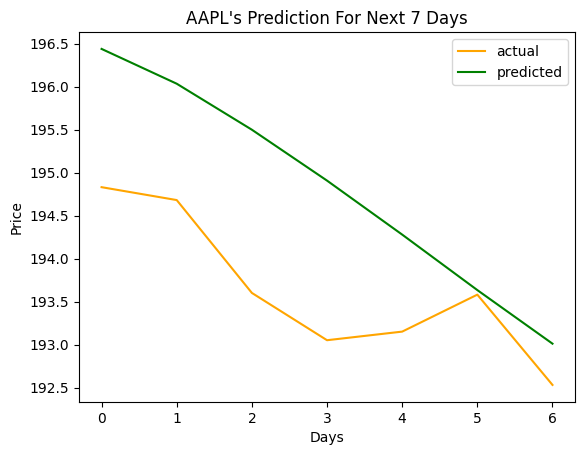

In [85]:
plt.title(f"{ticker}'s Prediction For Next {len(df_future)} Days")
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df_future, color='orange', label='actual')
plt.plot(result, color='green', label='predicted')
plt.legend()

In [138]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    inv = []
    curr_val = 1000
    print("*******************",np.where(controls))
    
#     inds = np.where(controls)[0]
#     print(inds)
#     buy_inds = np.where(controls>0)[0]
#     sell_inds = np.where(controls<0)[0]
#     max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
#     for i in range(buy_inds[0]+2):
#         inv.append(curr_val)
#     for i in range(buy_inds[0],max_limit+1):
#         if controls[i]>0:
#             buy_val = val[i+1]
#         elif controls[i]<0:
#             sell_val = val[i+1]
#             curr_val = curr_val*sell_val/buy_val
#         inv.append(curr_val)
        
#     if max_limit+1!=len(controls):
#         for i in range(len(controls)-max_limit-1):
#             inv.append(curr_val)
#     return inv

In [139]:
# controls_actual = get_control_vector(df_future)
# amount_actual = buy_and_sell_bot(future_data, controls_actual)
# controls_actual,amount_actual

In [156]:
controls_pred= get_control_vector(np.array(result))
# amount_pred = buy_and_sell_bot(result, controls_pred)
# amount_pred,
np.sign(np.diff(np.array(result))), np.sign(np.diff(df_future))

(array([1., 1., 1., 1., 1., 1.], dtype=float32),
 array([ 1., -1., -1., -1.,  1., -1.]))

In [154]:
df_future

array([152.11999512, 153.83999634, 153.41999817, 153.41000366,
       153.33999634, 153.38000488, 151.94000244])

In [155]:
result = np.array(result)
result

array([153.55403, 154.67691, 155.34634, 155.79456, 156.12683, 156.38371,
       156.59152], dtype=float32)